# **Semiconductor Process Optimization Using Machine Learning**

**Project Overview:**

This project aims to optimize semiconductor fabrication processes by leveraging machine learning techniques to predict device performance metrics based on synthetic data. The dataset is generated by simulating various process parameters such as doping concentration, temperature, and material type (e.g., Silicon and Germanium), and their impact on device performance, including power consumption and carrier mobility.

Key objectives include:


*   **Simulation of semiconductor processes:** Creating a synthetic dataset that
reflects realistic semiconductor process parameters and performance characteristics.
*  **Application of machine learning:** Using models like Random Forest Regressor to predict device performance, such as power consumption, based on the process parameters.
*   **Optimization**: Utilizing the generated dataset to perform sensitivity analysis and process optimization techniques for improving device efficiency and yield.

The project uses Python and machine learning libraries like pandas, numpy, and scikit-learn for data generation, modeling, and evaluation, providing insights into how process parameters can be optimized for better semiconductor device performance.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Simulate power consumption based on doping concentration and temperature
def power_consumption(doping_concentration, material, temperature):
    # Power consumption increases with doping and temperature (simplified)
    if material == 'Silicon':
        return 0.5 * np.log(doping_concentration) * temperature / 300  # in Watts
    else:  # For Germanium
        return 0.6 * np.log(doping_concentration) * temperature / 300  # in Watts

# Simulate mobility based on temperature and material
def carrier_mobility(temperature, material):
    # Mobility decreases with increasing temperature and material type influences it
    if material == 'Silicon':
        return 1400 / (1 + 0.001 * (temperature - 300))  # in cm^2/Vs
    else:  # For Germanium
        return 3900 / (1 + 0.001 * (temperature - 300))  # in cm^2/Vs


In [18]:
def generate_synthetic_dataset():
    np.random.seed(42)

    # Generate synthetic values for doping concentration and temperature
    doping_concentration = np.logspace(18, 22, 300)  # Doping concentration in m^-3
    temperature = np.random.uniform(300, 1000, 300)  # Temperature in K
    materials = np.random.choice(['Silicon', 'Germanium'], size=300)

    # Calculate device performance metrics (Power Consumption and Mobility)
    power_consumption_values = []
    mobility_values = []

    for mat, doping, temp in zip(materials, doping_concentration, temperature):
        power = power_consumption(doping, mat, temp)
        mobility = carrier_mobility(temp, mat)

        power_consumption_values.append(power)
        mobility_values.append(mobility)

    # Create a DataFrame for the synthetic dataset
    data = pd.DataFrame({
        'Doping Concentration (m^-3)': doping_concentration,
        'Temperature (K)': temperature,
        'Material': materials,
        'Power Consumption (W)': power_consumption_values,
        'Mobility (cm^2/Vs)': mobility_values
    })

    return data

# Generate the synthetic dataset
synthetic_data = generate_synthetic_dataset()
print(synthetic_data.head())


   Doping Concentration (m^-3)  Temperature (K)   Material  \
0                 1.000000e+18       562.178083    Silicon   
1                 1.031283e+18       965.500014  Germanium   
2                 1.063545e+18       812.395759  Germanium   
3                 1.096816e+18       719.060939  Germanium   
4                 1.131128e+18       409.213048    Silicon   

   Power Consumption (W)  Mobility (cm^2/Vs)  
0              38.833886         1109.193717  
1              80.092736         2341.639127  
2              67.442073         2578.690119  
3              59.738063         2748.296351  
4              28.351471         1262.156086  


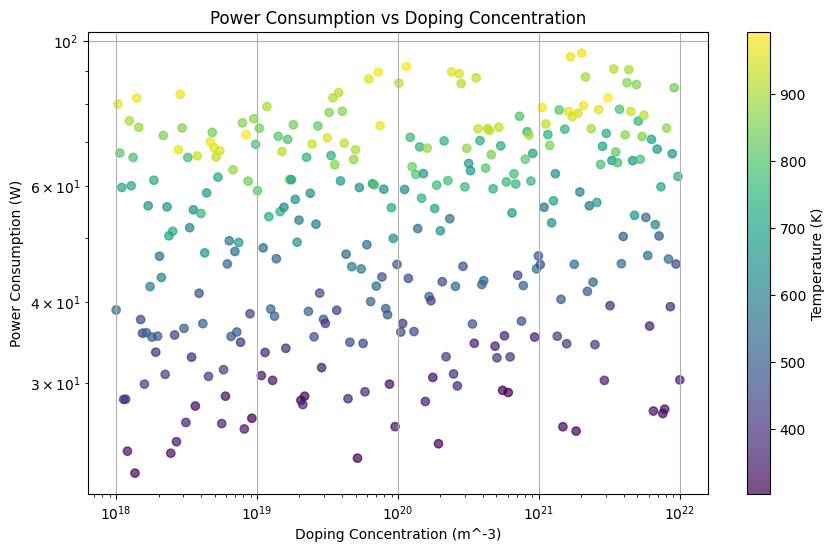

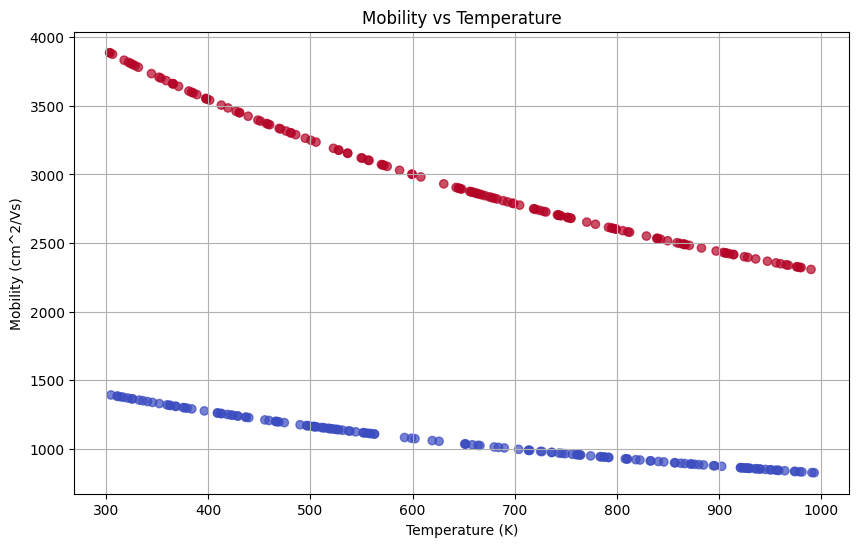

In [19]:
# Visualize Power Consumption vs Doping Concentration
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_data['Doping Concentration (m^-3)'], synthetic_data['Power Consumption (W)'], c=synthetic_data['Temperature (K)'], cmap='viridis', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Temperature (K)')
plt.xlabel('Doping Concentration (m^-3)')
plt.ylabel('Power Consumption (W)')
plt.title('Power Consumption vs Doping Concentration')
plt.grid(True)
plt.show()

# Visualize Mobility vs Temperature
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_data['Temperature (K)'], synthetic_data['Mobility (cm^2/Vs)'], c=synthetic_data['Material'].map({'Silicon': 0, 'Germanium': 1}), cmap='coolwarm', alpha=0.7)
plt.xlabel('Temperature (K)')
plt.ylabel('Mobility (cm^2/Vs)')
plt.title('Mobility vs Temperature')
plt.grid(True)
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Preprocessing the data for machine learning
def preprocess_data(data):
    # One-hot encode the 'Material' column
    data = pd.get_dummies(data, columns=['Material'], drop_first=True)

    # Features and target variable
    X = data[['Doping Concentration (m^-3)', 'Temperature (K)', 'Material_Silicon']]
    y = data['Power Consumption (W)']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Preprocess the synthetic dataset
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(synthetic_data)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict power consumption on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4e}")


Mean Squared Error: 2.3466e+00
